In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("output.csv")
df.head()

,M,N,K,iter,error,time
0,256,16,-1,0,255.025893,30.0
1,256,16,16,1,152632.918360,30.0
2,256,16,16,2,152632.918360,30.0
3,256,16,16,3,152632.918360,30.0
4,256,16,16,4,152632.918360,20.0


In [3]:
df = df.drop(4706, axis = 0)

In [4]:
df.columns = ["M", "N", "K", "iter", "error", "time"]
df.columns

Index(['M', 'N', 'K', 'iter', 'error', 'time'], dtype='object')

In [5]:
groups = df.groupby(["M", "N", "K"])

In [6]:
Mean_values = groups.mean().reset_index()
Mean_values.head()

,M,N,K,iter,error,time
0,256,16,-1,0.0,255.025893,30.0
1,256,16,16,10.5,967037.294308,28.5
2,256,16,28,10.5,558.115540,28.0
3,256,16,40,10.5,348.875500,26.5
4,256,16,52,10.5,310.620158,28.5


In [7]:
Mean_values = Mean_values.drop(["iter"], axis = 1)
Mean_values["rho"]= [0]*len(Mean_values)
Mean_values["relative_time"] = [0]*len(Mean_values)

In [8]:
Mean_values.head()

,M,N,K,error,time,rho,relative_time
0,256,16,-1,255.025893,30.0,0,0
1,256,16,16,967037.294308,28.5,0,0
2,256,16,28,558.115540,28.0,0,0
3,256,16,40,348.875500,26.5,0,0
4,256,16,52,310.620158,28.5,0,0


In [9]:
for i in range(len(Mean_values)):
    if Mean_values.iloc[i, 2]==-1:
        curr = i
    Mean_values.iloc[i, 5] = (1.0*Mean_values.iloc[i, 3]/Mean_values.iloc[curr, 3])-1.0
    Mean_values.iloc[i, 6] = (1.0*Mean_values.iloc[i, 4])/Mean_values.iloc[curr, 4]

Mean_values.head(20)

,M,N,K,error,time,rho,relative_time
0,256,16,-1,2.550259e+02,30.0,0.000000,1.000000
1,256,16,16,9.670373e+05,28.5,3790.918079,0.950000
2,256,16,28,5.581155e+02,28.0,1.188466,0.933333
3,256,16,40,3.488755e+02,26.5,0.368000,0.883333
4,256,16,52,3.106202e+02,28.5,0.217995,0.950000
5,256,16,64,2.906563e+02,29.0,0.139713,0.966667
6,256,16,76,2.807558e+02,33.5,0.100891,1.116667
7,256,16,88,2.727784e+02,34.0,0.069610,1.133333
8,256,16,100,2.675403e+02,34.0,0.049071,1.133333
9,256,16,112,2.705932e+02,38.0,0.061042,1.266667


In [69]:
Mean_values[Mean_values["M"]==512]

,M,N,K,error,time,rho,relative_time
90,512,22,-1,5.110709e+02,690.0,0.000000e+00,1.000000
91,512,22,22,4.868875e+08,98.0,9.526799e+05,0.142029
92,512,22,47,9.418058e+02,105.0,8.428085e-01,0.152174
93,512,22,72,6.247020e+02,116.5,2.223392e-01,0.168841
94,512,22,97,5.704407e+02,122.5,1.161674e-01,0.177536
95,512,22,122,5.443412e+02,128.0,6.509907e-02,0.185507
96,512,22,147,5.343803e+02,136.5,4.560886e-02,0.197826
97,512,22,172,5.278781e+02,147.0,3.288620e-02,0.213043
98,512,22,197,5.241053e+02,159.0,2.550403e-02,0.230435
99,512,22,222,5.218779e+02,172.0,2.114577e-02,0.249275


In [10]:
Mean_values["M"].unique()

array([ 256,  512, 1024, 2048])

In [53]:
plt.rcParams['figure.figsize'] = [18, 9]
plt.style.use('ggplot')

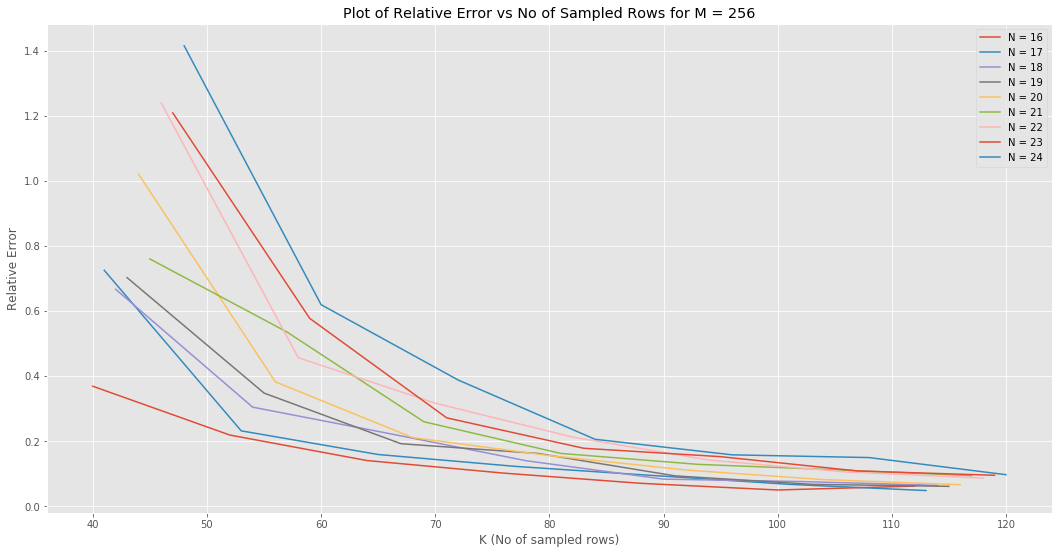

In [68]:
m = 256; l = 3
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values, Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 5].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Error")
plt.title("Plot of Relative Error vs No of Sampled Rows for M = 256")
#plt.yticks(np.arange(0, 1.4, 0.1))
#plt.savefig("M_256.png")
plt.show()

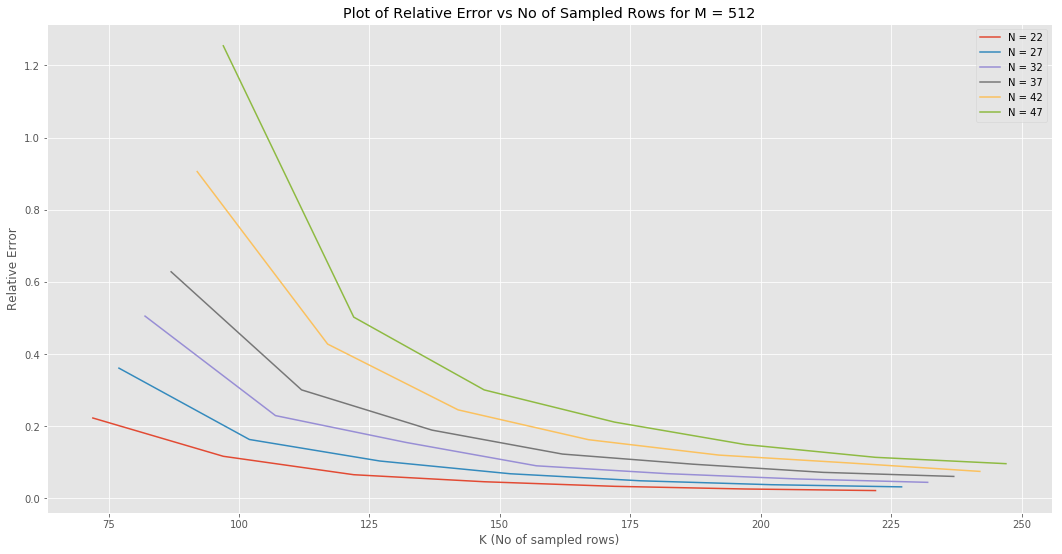

In [55]:
m = 512; l = 3
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values, Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 5].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Error")
plt.title("Plot of Relative Error vs No of Sampled Rows for M = 512")
plt.show()

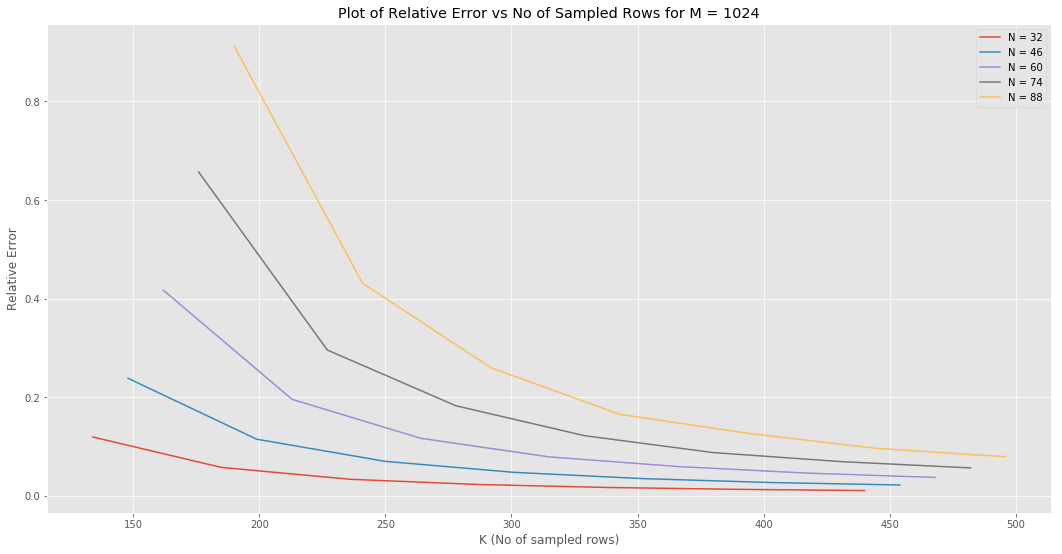

In [56]:





















m = 1024; l = 3
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values, Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 5].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Error")
plt.title("Plot of Relative Error vs No of Sampled Rows for M = 1024")
plt.show()

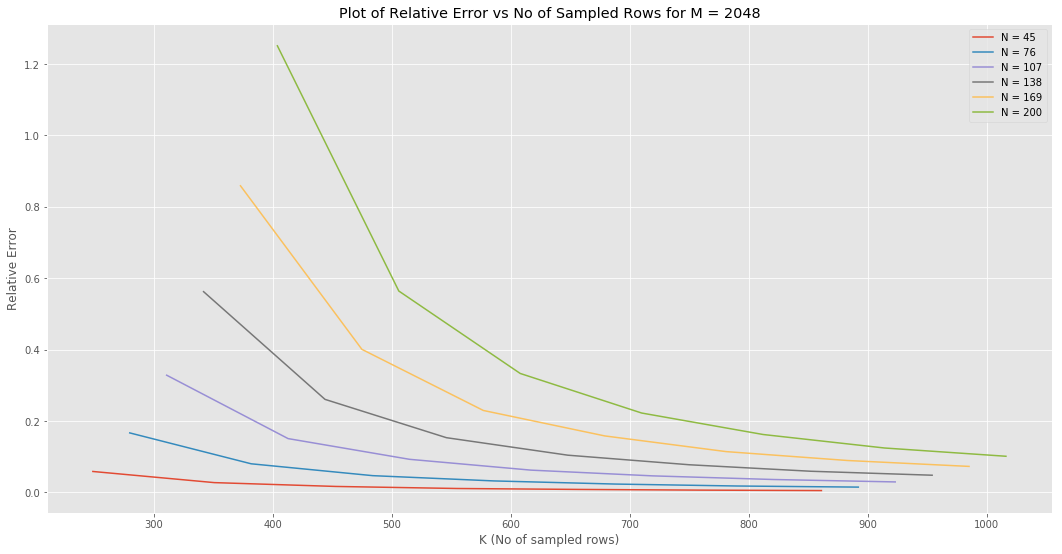

In [57]:
m = 2048; l = 3
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values,Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 5].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Error")
plt.title("Plot of Relative Error vs No of Sampled Rows for M = 2048")
plt.show()

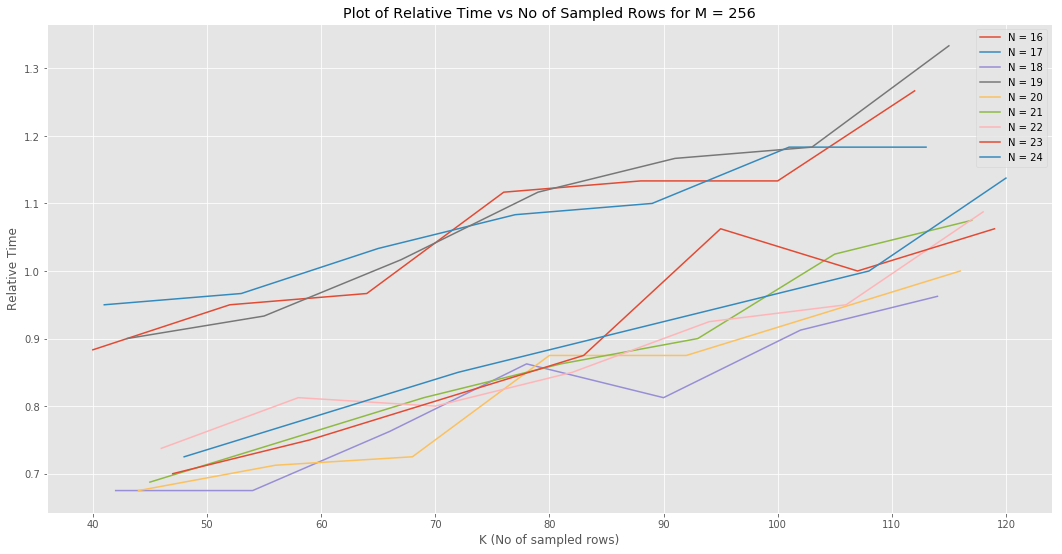

In [58]:
m = 256; l= 3
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values, Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 6].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Time")
plt.title("Plot of Relative Time vs No of Sampled Rows for M = 256")
plt.show()

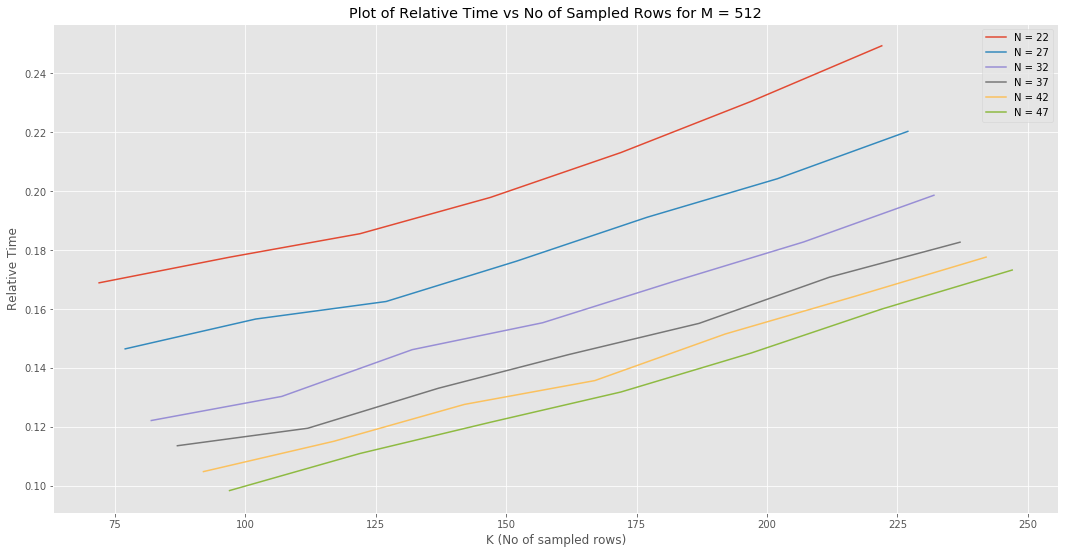

In [59]:
m = 512; l = 3
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values, Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 6].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Time")
plt.title("Plot of Relative Time vs No of Sampled Rows for M = 512")
plt.show()

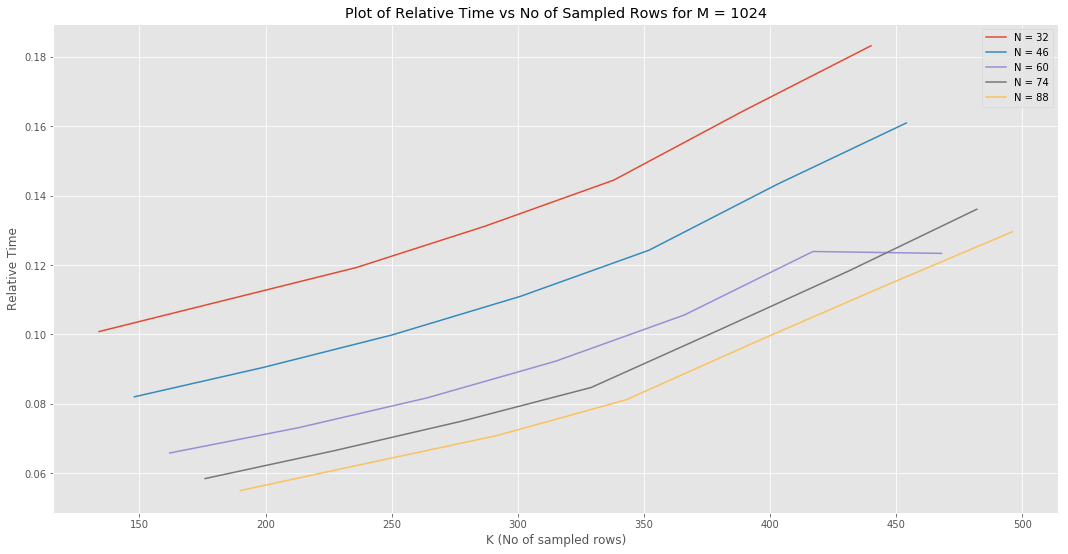

In [60]:
l = 3
m = 1024
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values, Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 6].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Time")
plt.title("Plot of Relative Time vs No of Sampled Rows for M = 1024")
plt.show()

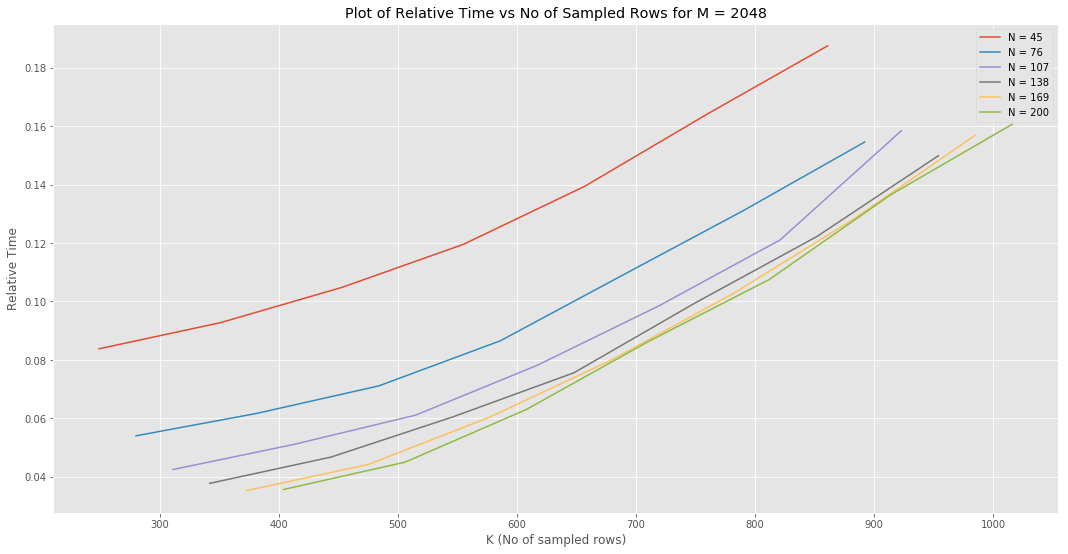

In [61]:
l = 3
m = 2048
for n in Mean_values[(Mean_values["M"]==m)].iloc[:, 1].unique():
    plt.plot(Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 2].values, Mean_values[(Mean_values["M"]==m) & (Mean_values["N"]==n)].iloc[l:, 6].values, label = "N = {}".format(n))
plt.legend()
plt.xlabel("K (No of sampled rows)")
plt.ylabel("Relative Time")
plt.title("Plot of Relative Time vs No of Sampled Rows for M = 2048")
plt.show()